In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("penguins_raw.csv")

In [3]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(0, 0, 'Gentoo penguin (Pygoscelis papua)'),
 Text(0, 0, 'Chinstrap penguin (Pygoscelis antarctica)')]

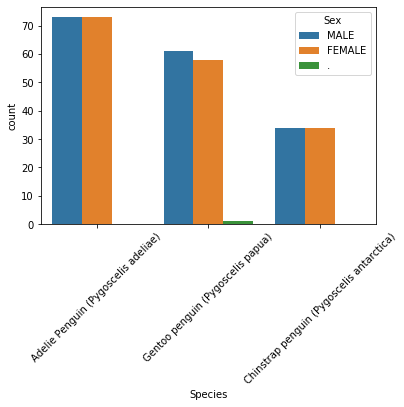

In [5]:
chart_species_sex = sns.countplot(x='Species', hue='Sex',data=df)
chart_species_sex.set_xticklabels(chart_species_sex.get_xticklabels(),rotation=45)

# This is a classification problem. We should use the other features to predict the species (e.g. Adelie Penguin, Gentoo penguin,  Chinstrap penguin) of the penguins. The numbers of each species are no equal. The male to female ratio of each species is approximately 50:50.

[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(0, 0, 'Gentoo penguin (Pygoscelis papua)'),
 Text(0, 0, 'Chinstrap penguin (Pygoscelis antarctica)')]

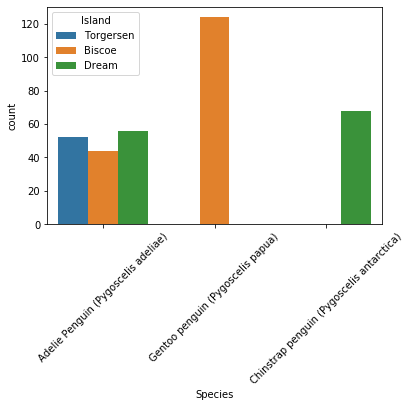

In [6]:
chart_species_island = sns.countplot(x='Species', hue='Island',data=df)
chart_species_island.set_xticklabels(chart_species_island.get_xticklabels(),rotation=45)

# The samples of Adelie penguins were collected from all 3 islands. Gentoo penguins were collected only from Biscoe Island. Chinstrap penguins were collected only from Dream Island.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

# We can see from above that there are 344 entries, but some features such as Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Delta 15 N (o/oo), Delta 13 C (o/oo), Comments have missing values.

In [8]:
penguin_missing = round((df.isnull().sum())/(df.isnull().count())*100,1)
penguin_missing.sort_values(ascending=False)

Comments               84.3
Delta 15 N (o/oo)       4.1
Delta 13 C (o/oo)       3.8
Sex                     2.9
Body Mass (g)           0.6
Flipper Length (mm)     0.6
Culmen Depth (mm)       0.6
Culmen Length (mm)      0.6
Island                  0.0
Sample Number           0.0
Species                 0.0
Region                  0.0
Date Egg                0.0
Stage                   0.0
Individual ID           0.0
Clutch Completion       0.0
studyName               0.0
dtype: float64

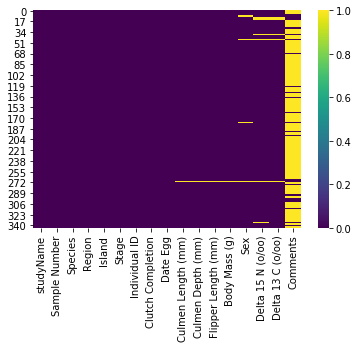

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')

# Comments has 84.3% missing values and it is not useful to predict the species, so we can drop it. The other missing values can be imputed.

In [10]:
df.drop('Comments',axis=1,inplace=True)

In [11]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


# We can impute missing values with their means.

In [12]:
df['Delta 15 N (o/oo)'].fillna(8.733382	,inplace=True)

In [13]:
df['Delta 13 C (o/oo)'].fillna(-25.686292,inplace=True)

In [14]:
df['Body Mass (g)'].fillna(4202,inplace=True)

In [15]:
df['Flipper Length (mm)'].fillna(201,inplace=True)

In [16]:
df['Culmen Depth (mm)'].fillna(17.151170,inplace=True)

In [17]:
df['Culmen Length (mm)'].fillna(43.921930,inplace=True)

# For Sex, we can randomly assign the missing values with MALE or FEMALE.

In [18]:
gender = ['FEMALE', 'MALE']
for i in df[df['Sex'].isnull()].index.tolist():
    df['Sex'][i] = gender[np.random.randint(2)]

C:\Users\Ulysses\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df['Sex']

0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342      MALE
343    FEMALE
Name: Sex, Length: 344, dtype: object

In [20]:
penguin_missing = round((df.isnull().sum())/(df.isnull().count())*100,1)
penguin_missing.sort_values(ascending=False)

Delta 13 C (o/oo)      0.0
Delta 15 N (o/oo)      0.0
Sex                    0.0
Body Mass (g)          0.0
Flipper Length (mm)    0.0
Culmen Depth (mm)      0.0
Culmen Length (mm)     0.0
Date Egg               0.0
Clutch Completion      0.0
Individual ID          0.0
Stage                  0.0
Island                 0.0
Region                 0.0
Species                0.0
Sample Number          0.0
studyName              0.0
dtype: float64

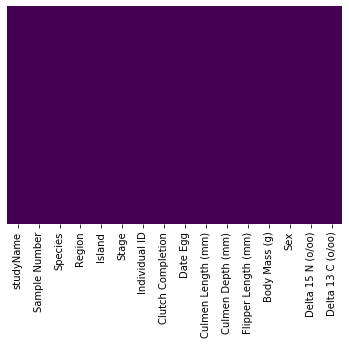

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# There is no missing value now. Next we should convert values in some features to 0 or 1.  For features such as Clutch Completion, Sex, the values can be converted to 0 and 1.

In [22]:
sex = pd.get_dummies(df['Sex'])
sex.head()

,.,FEMALE,MALE
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


# One of the values in Sex is a '.', we should randomly assign it.

In [23]:
df['Sex'].replace('.', gender[np.random.randint(2)], inplace=True)
sex = pd.get_dummies(df['Sex'])
sex.head()

,FEMALE,MALE
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [24]:
Clutch_Completion = pd.get_dummies(df['Clutch Completion'])
Clutch_Completion.head()

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
df = pd.concat([df,sex.iloc[:,1],Clutch_Completion.iloc[:,1]],axis=1)

In [26]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),MALE,Yes
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.10000,18.70000,181.0,3750.0,MALE,8.733382,-25.686292,1,1
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.50000,17.40000,186.0,3800.0,FEMALE,8.949560,-24.694540,0,1
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.30000,18.00000,195.0,3250.0,FEMALE,8.368210,-25.333020,0,1
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,43.92193,17.15117,201.0,4202.0,MALE,8.733382,-25.686292,1,1
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.70000,19.30000,193.0,3450.0,FEMALE,8.766510,-25.324260,0,1


In [27]:
df.nunique()

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     165
Culmen Depth (mm)       81
Flipper Length (mm)     55
Body Mass (g)           95
Sex                      2
Delta 15 N (o/oo)      331
Delta 13 C (o/oo)      332
MALE                     2
Yes                      2
dtype: int64

# studyName, Sample Number, Individual ID and Date Egg are not related to the species, so we can drop them. Region and Stage have only 1 unique value, so we can also drop them since they do not provide any useful information.

In [28]:
df.drop('studyName',axis=1,inplace=True)
df.drop('Sample Number',axis=1,inplace=True)
df.drop('Individual ID',axis=1,inplace=True)
df.drop('Region',axis=1,inplace=True)
df.drop('Stage',axis=1,inplace=True)

In [29]:
df.drop('Date Egg',axis=1,inplace=True)

# We should also drop the old Sex and Clutch Completion columns and rename the new ones.

In [30]:
df.drop('Sex',axis=1,inplace=True)
df.drop('Clutch Completion',axis=1,inplace=True)

In [31]:
df.rename(columns={"MALE": "Sex", "Yes": "Clutch Completion"}, inplace=True)

In [32]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Clutch Completion
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.10000,18.70000,181.0,3750.0,8.733382,-25.686292,1,1
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.50000,17.40000,186.0,3800.0,8.949560,-24.694540,0,1
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.30000,18.00000,195.0,3250.0,8.368210,-25.333020,0,1
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,43.92193,17.15117,201.0,4202.0,8.733382,-25.686292,1,1
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.70000,19.30000,193.0,3450.0,8.766510,-25.324260,0,1


In [33]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# Similarly, we can convert the Island column into 2 columns: Dream and Torgersen. If both new columns have values of 0, then it indicates that the island is Biscoe.

In [34]:
island = pd.get_dummies(df['Island'], drop_first=True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
df = pd.concat([df,island],axis=1)
df.drop('Island',axis=1,inplace=True)

In [36]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Clutch Completion,Dream,Torgersen
0,Adelie Penguin (Pygoscelis adeliae),39.10000,18.70000,181.0,3750.0,8.733382,-25.686292,1,1,0,1
1,Adelie Penguin (Pygoscelis adeliae),39.50000,17.40000,186.0,3800.0,8.949560,-24.694540,0,1,0,1
2,Adelie Penguin (Pygoscelis adeliae),40.30000,18.00000,195.0,3250.0,8.368210,-25.333020,0,1,0,1
3,Adelie Penguin (Pygoscelis adeliae),43.92193,17.15117,201.0,4202.0,8.733382,-25.686292,1,1,0,1
4,Adelie Penguin (Pygoscelis adeliae),36.70000,19.30000,193.0,3450.0,8.766510,-25.324260,0,1,0,1


# Now the data set is fit for use. We can build a logistic model for it.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use Species as output and the other features as inputs, then split them with 30% test data and 70% training data. Now we can build a logistic model

In [40]:
logR = LogisticRegression()
logR.fit(X_train, y_train)

C:\Users\Ulysses\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Find the predicted values for test data

In [41]:
y_pred = logR.predict(X_test)

# Now check the performance of the model

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
print(classification_report(y_test,y_pred))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.98      1.00      0.99        46
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.94      0.97        18
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        40

                                 accuracy                           0.99       104
                                macro avg       0.99      0.98      0.99       104
                             weighted avg       0.99      0.99      0.99       104



# From the classification report, Adelie Penguin is 98% correctly classified, while the other 2 are 100% correct.

In [44]:
print(confusion_matrix(y_test, y_pred))

[[46  0  0]
 [ 1 17  0]
 [ 0  0 40]]


# The confusion matrix shows that 1 Adelie Penguin is incorrectly classified as a Chinstrap penguin. All other cases are correct.

# We can also solve the problem with SVM. First we build a new model with default settings.

In [45]:
from sklearn.svm import SVC

In [46]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred_svm = svm_model.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[44  0  2]
 [17  0  1]
 [ 1  0 39]]
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.71      0.96      0.81        46
Chinstrap penguin (Pygoscelis antarctica)       0.00      0.00      0.00        18
        Gentoo penguin (Pygoscelis papua)       0.93      0.97      0.95        40

                                 accuracy                           0.80       104
                                macro avg       0.55      0.64      0.59       104
                             weighted avg       0.67      0.80      0.73       104



C:\Users\Ulysses\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# The confusion matrix and classifcation report show that the precision is very low. Especially for Chinstrap penguins, none is correctly classified. Therefore, we need to change the settings of hyperparameters C and gamma. Using GridSearchCV, we can find the best combination of C and gamma.

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

In [50]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] 

[CV] ............................... C=10, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ............................... C=10, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ............................... C=10, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ............................... C=10, gamma=0.0001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [51]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [52]:
grid_predictions = grid.predict(X_test)

In [53]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[39  5  2]
 [ 4 13  1]
 [ 0  0 40]]
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.91      0.85      0.88        46
Chinstrap penguin (Pygoscelis antarctica)       0.72      0.72      0.72        18
        Gentoo penguin (Pygoscelis papua)       0.93      1.00      0.96        40

                                 accuracy                           0.88       104
                                macro avg       0.85      0.86      0.85       104
                             weighted avg       0.88      0.88      0.88       104



# The above result shows that th best combiantion is C=100 and gamma=0.0001. By changing the hyperparameters, the performance of SVM model has been greatly improved. However, the logistic model provides better results.